## Libraries and Imports

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# For reproducibility
np.random.seed(42)

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

%matplotlib inline

In [2]:
def create_sample_dir_of_images(directory, num_samples):
    import os
    import shutil
    files = os.listdir(directory)
    index = np.linspace(0, len(train_files)-1, num_samples, dtype='int')
    os.chdir(directory)
    os.mkdir('sample_of_files')
    subdirectory = training_dir + 'sample_of_files'
    for i in index:
        shutil.copy(training_dir+files[i], subdirectory, follow_symlinks=False)

## Parameters

In [3]:
training_dir = './images/new_model'
validate_dir = 'D:/Google Drive/capstone_images/keepers/'
image_height = 256
image_width  = 256
batch_size   = 64
num_epochs   = 100

## Model Construction

In [4]:
# Instantiates model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32,
                 kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu',       
                 input_shape=(image_height, image_width, 3))) 

          
# pooling layer, no striding
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

# pooling layer, no striding
model.add(MaxPooling2D(pool_size=(2, 2)))

# convolutional layer
model.add(Conv2D(128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

# pooling layer, no striding
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Fully connected & dropout layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compiles model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Model Fitting

In [5]:
train_image_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',    # constant, nearest, reflect, wrap
    validation_split=0.2)

training_generator = train_image_datagen.flow_from_directory(
    training_dir,
    target_size=(image_height, image_width), # Images resized to this.
    color_mode='rgb',
    batch_size = batch_size,
    class_mode='binary',
    subset='training')
    
validation_generator = train_image_datagen.flow_from_directory(
    training_dir,
    target_size=(image_height, image_width),
    batch_size = batch_size,
    class_mode='binary',
    subset='validation')
    
history = model.fit(
    training_generator,
    steps_per_epoch = training_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs=num_epochs)

Found 1205 images belonging to 2 classes.
Found 301 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 4 steps
Epoch 1/100
18/18 [==============================] - 29s 2s/step - loss: 0.8086 - accuracy: 0.5320 - val_loss: 0.6831 - val_accuracy: 0.6016
Epoch 2/100
18/18 [==============================] - 28s 2s/step - loss: 0.6159 - accuracy: 0.5635 - val_loss: 0.6268 - val_accuracy: 0.6016
Epoch 3/100
18/18 [==============================] - 28s 2s/step - loss: 0.4929 - accuracy: 0.6249 - val_loss: 0.6266 - val_accuracy: 0.7148
Epoch 4/100
18/18 [==============================] - 28s 2s/step - loss: 0.4164 - accuracy: 0.8431 - val_loss: 0.6193 - val_accuracy: 0.6016
Epoch 5/100
18/18 [==============================] - 28s 2s/step - loss: 0.4009 - accuracy: 0.8834 - val_loss: 0.6002 - val_accuracy: 0.6680
Epoch 6/100
18/18 [==============================] - 28s 2s/step - loss: 0.4024 - accuracy: 0.8799 - val_loss: 0.6122 - v

## Summary & Analysis

In [6]:
training_generator.class_indices

{'0_portraits': 0, '1_landscapes': 1}

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

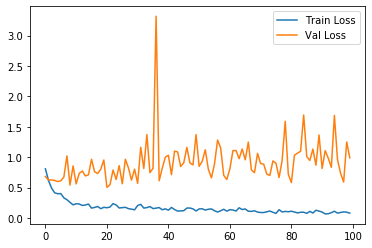

In [8]:
# Generates line plot for loss.
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

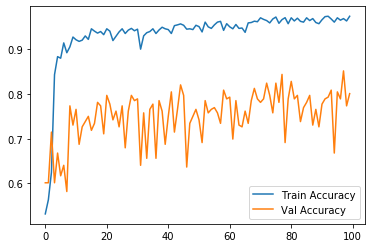

In [9]:
# Generates line plot for accuracy.
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend();